In [103]:
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [205]:
sns.set_theme(style='whitegrid', font_scale=.7, palette='Set1', font='Monospace')

asthetic_constraint=dict(
  color=sns.color_palette('Set2')[-1],
  alpha=.9
)

In [ ]:
path = kagglehub.dataset_download("shivkumarganesh/tinder-google-play-store-review")

os.chdir(path)

data=pd.read_csv(
  os.path.join(path, os.listdir()[0])
)

data.info(1)

In [12]:
data.index.size() == data.reviewId.nunique()

True

In [13]:
data=data.iloc[:,[0,3,4,5,7,10]].copy()

In [14]:
data.sample(5)

,reviewId,content,score,thumbsUpCount,at,appVersion
297013,9cd366e1-9a55-46ad-a327-e17d467b21ec,great,5,0,2019-08-11 17:46:16,10.20.0
451896,36211419-842f-4138-b5d7-6dccf3bbe94f,Great to know what beauty is around you.,5,0,2017-07-02 21:42:14,7.3.0
261830,2e6d7ece-e47d-4011-a21c-ee1891736195,I paid 20 dollars and had plus for 3 days then...,1,1,2020-02-12 04:06:16,11.7.0
387198,c1f45049-b7db-445d-bd86-a0774646fb67,Im not getting luck. My sister used this app a...,4,0,2018-07-26 02:38:24,9.0.0
480985,1c2771ce-e224-4d95-9ba0-e719844d997f,Good,5,0,2017-01-01 14:51:49,6.7.0


In [15]:
data=data.drop('reviewId', axis=1)
data.sample(3)

,content,score,thumbsUpCount,at,appVersion
87712,Love this app🥰🥰,5,0,2023-02-01 22:18:37,14.1.0
633593,Great app,5,0,2013-12-26 07:26:25,2.1.1
321456,Please help! My account got reset and I can't ...,1,0,2019-05-03 16:48:46,6.9.2


In [32]:
data_processed_some=pd.DataFrame(dict(
  thumb=data.thumbsUpCount,
  star=data.score,
  review=data.content,
  ver=data.appVersion
))
data_processed_some.sample(3)

,thumb,star,review,ver
449044,0,5,Amazing app. Help to find whatever you are her...,7.3.0
178842,60,1,Horrible experience...this is happening again ...,12.8.0
191326,0,3,Keep crashing all the time due to WebView upda...,NaN


In [30]:
_at=pd.to_datetime(data['at']).round('3h')
_at.to_frame().sample(3)

,at
279289,2019-11-03 06:00:00
169965,2021-07-30 12:00:00
241141,2020-06-03 09:00:00


In [31]:
data_dt=pd.DataFrame(dict(
  at=_at,
  atYear=_at.dt.year,
  atMonth=_at.dt.month,
  atHourInterval=_at.dt.hour,
  atDay=_at.dt.dayofweek
))
data_dt.sample(3)

,at,atYear,atMonth,atHourInterval,atDay
488700,2016-11-15 00:00:00,2016,11,0,1
66342,2023-07-09 06:00:00,2023,7,6,6
395528,2018-05-29 18:00:00,2018,5,18,1


In [165]:
data_processed=pd.concat([
  data_processed_some,
  data_dt
],axis=1).dropna(subset='review').sort_values('atYear')
data_processed.sample(3)

,thumb,star,review,ver,at,atYear,atMonth,atHourInterval,atDay
545617,0,5,Superb appp. I love it,NaN,2015-11-26 15:00:00,2015,11,15,3
267449,0,1,Banned for no reason. All i do is swipe and i ...,10.12.0,2020-01-12 15:00:00,2020,1,15,6
548168,0,1,Getting bored of the consistent login failed m...,4.4.2,2015-11-16 12:00:00,2015,11,12,0


In [157]:
data_processed.isna().sum()

thumb                  0
star                   0
review                 0
ver               131299
at                     0
atYear                 0
atMonth                0
atHourInterval         0
atDay                  0
dtype: int64

In [185]:
_ver_interp=pd.DataFrame(
  dict(
    ind=data_processed.index,
    ver=data_processed.ver.to_list()
  ),
  index=data_processed['at']
)
_ver_interp.ver[data_processed.ver.isna().to_list()]

at
2025-01-10 00:00:00    NaN
2025-01-09 21:00:00    NaN
2025-01-09 21:00:00    NaN
2025-01-09 21:00:00    NaN
2025-01-09 21:00:00    NaN
                      ... 
2013-07-24 09:00:00    NaN
2013-07-23 21:00:00    NaN
2013-07-23 00:00:00    NaN
2013-07-17 12:00:00    NaN
2013-07-16 21:00:00    NaN
Name: ver, Length: 131299, dtype: object

In [193]:
_ver_interp.interpolate('pad')[data_processed.ver.isna().to_list()]

,ind,ver
at,,
2025-01-10 00:00:00,10,15.23.0
2025-01-09 21:00:00,24,15.23.0
2025-01-09 21:00:00,17,15.23.0
2025-01-09 21:00:00,18,15.23.0
2025-01-09 21:00:00,13,15.23.0
...,...,...
2013-07-24 09:00:00,640972,1.0.7
2013-07-23 21:00:00,640980,1.0.7
2013-07-23 00:00:00,640993,1.0.6


In [194]:
_ver_interp=_ver_interp.interpolate('pad')
data_processed.loc[:, 'ver']=_ver_interp.ver.to_list()
data_processed.ver.isna().sum()

0

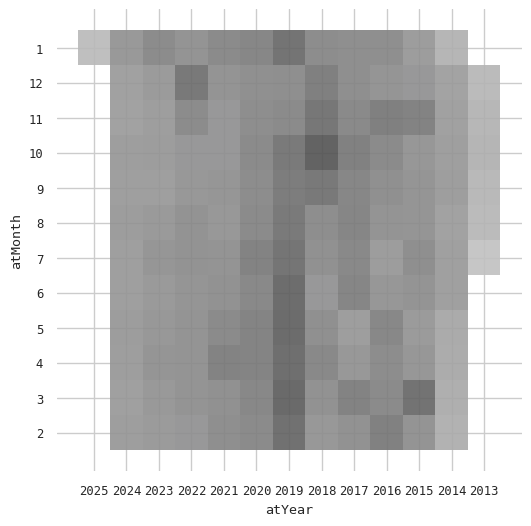

In [195]:
plt.subplots(figsize=(6,6))
sns.histplot(data_processed, x=data_processed.atYear.astype('str'), y=data_processed.atMonth.astype('str'), stat='count', **asthetic_constraint)
sns.despine(left=True,right=True,top=True,bottom=True)

<Axes: xlabel='atYear', ylabel='star'>

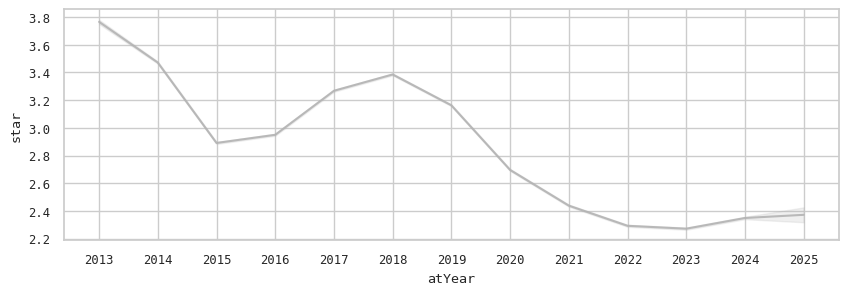

In [111]:
plt.subplots(figsize=(10,3))
sns.lineplot(data_processed, x=data_processed.atYear.astype('str'), y='star', errorbar='se', n_boot=30*10**2, markers=True, **asthetic_constraint)

<Axes: xlabel='count', ylabel='atYear'>

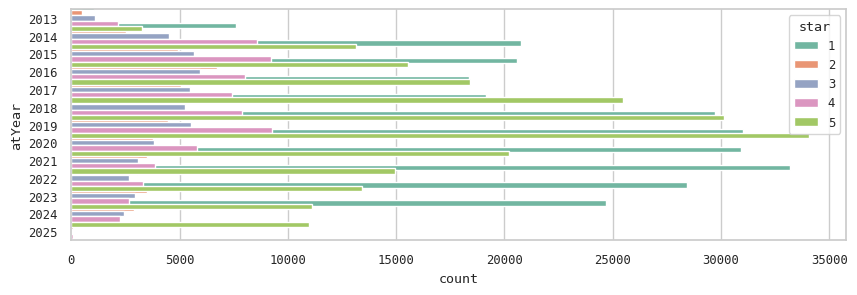

In [145]:
plt.subplots(figsize=(10,3))
sns.countplot(data_processed, y='atYear', hue='star', dodge=True, width=1.5, palette='Set2')

<Axes: xlabel='ver', ylabel='star'>

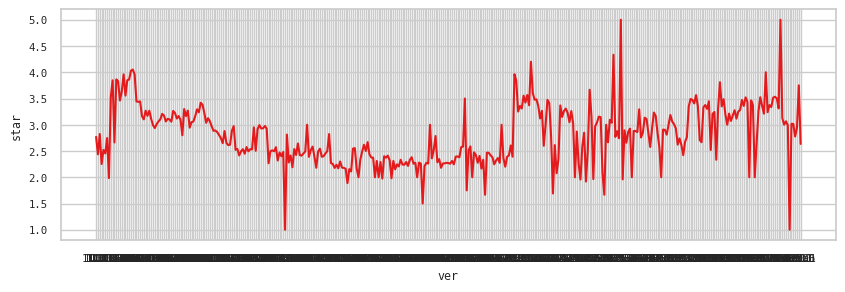

In [206]:
plt.subplots(figsize=(10,3))
sns.lineplot(data_processed.groupby('ver').star.mean())

In [212]:
data_processed.ver.to_list()[0]

'15.21.1'

In [213]:
data_processed.loc[:, 'ver'] = data_processed.ver.apply(
  lambda q: q[:q.index('.')]
)

In [216]:
data_processed.ver.unique()

array(['15', '13', '12', '11', '8', '14', '4', '6', '10', '9', '3', '1',
       '5', '2', '7'], dtype=object)